In [ ]:
pip install -U scikit-fuzzy

In [2]:
import numpy as np
import skfuzzy as fuzz

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Universe Variables
x_temperature = np.arange(7, 17, 1)
x_pressure = np.arange(1.75, 4.25, 0.25)
x_CO2 = np.arange(2, 6.01, .01)

# Inputs
temperature = np.random.randint(7, 17)
pressure = np.random.choice(x_pressure, 1)[0]

print("Temperature: " + str(temperature))
print("Pressure: " + str(pressure))

Temperature: 10
Pressure: 3.0


In [4]:
# Membership Functions

temperature_vc = fuzz.trimf(x_temperature, [7, 7, 9])  # very cold
temperature_c = fuzz.trimf(x_temperature, [7, 9, 11])  # cold
temperature_n = fuzz.trimf(x_temperature, [10, 12, 14])  # normal
temperature_h = fuzz.trimf(x_temperature, [12, 14, 16])  # high
temperature_vh = fuzz.trimf(x_temperature, [13, 16, 16])  # very high

pressure_vl = fuzz.trimf(x_pressure, [1.75, 1.75, 2.25])  # very low
pressure_l = fuzz.trimf(x_pressure, [1.75, 2.25, 2.5])  # low
pressure_n = fuzz.trimf(x_pressure, [2.25, 2.75, 3.25])  # normal
pressure_g = fuzz.trimf(x_pressure, [2.5, 3.25, 3.5])  # good
pressure_vg = fuzz.trimf(x_pressure, [2.75, 4, 4])  # very good

CO2_vb = fuzz.trimf(x_CO2, [2, 2, 3])  # very bad
CO2_b = fuzz.trimf(x_CO2, [2, 3, 4])  # bad
CO2_n = fuzz.trimf(x_CO2, [3, 4, 5])  # normal
CO2_g = fuzz.trimf(x_CO2, [4, 5, 6])  # good
CO2_vg = fuzz.trimf(x_CO2, [5, 6, 6])  # very good

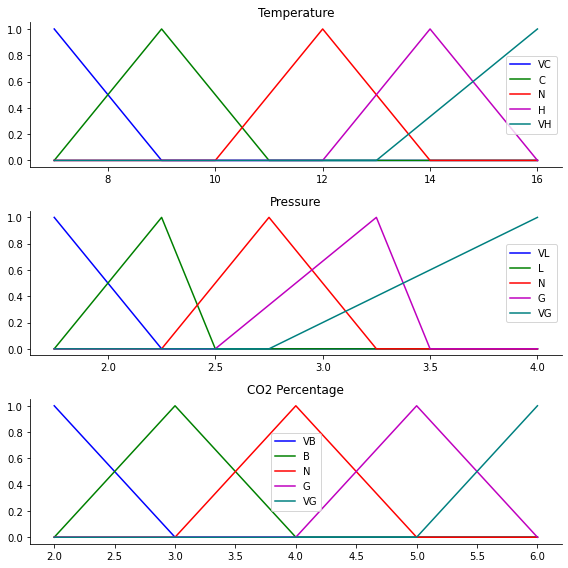

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (8, 8))

ax1.plot(x_temperature, temperature_vc, "b", linewidth = 1.5, label = "VC")
ax1.plot(x_temperature, temperature_c, "g", linewidth = 1.5, label = "C")
ax1.plot(x_temperature, temperature_n, "r", linewidth = 1.5, label = "N")
ax1.plot(x_temperature, temperature_h, "m", linewidth = 1.5, label = "H")
ax1.plot(x_temperature, temperature_vh, "teal", linewidth = 1.5, label = "VH")
ax1.set_title("Temperature")
ax1.legend()

ax2.plot(x_pressure, pressure_vl, "b", linewidth = 1.5, label = "VL")
ax2.plot(x_pressure, pressure_l, "g", linewidth = 1.5, label = "L")
ax2.plot(x_pressure, pressure_n, "r", linewidth = 1.5, label = "N")
ax2.plot(x_pressure, pressure_g, "m", linewidth = 1.5, label = "G")
ax2.plot(x_pressure, pressure_vg, "teal", linewidth = 1.5, label = "VG")
ax2.set_title("Pressure")
ax2.legend()

ax3.plot(x_CO2, CO2_vb, "b", linewidth = 1.5, label = "VB")
ax3.plot(x_CO2, CO2_b, "g", linewidth = 1.5, label = "B")
ax3.plot(x_CO2, CO2_n, "r", linewidth = 1.5, label = "N")
ax3.plot(x_CO2, CO2_g, "m", linewidth = 1.5, label = "G")
ax3.plot(x_CO2, CO2_vg, "teal", linewidth = 1.5, label = "VG")
ax3.set_title("CO2 Percentage")
ax3.legend()

for ax in (ax1, ax2, ax3):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [6]:
temperature_level_vc = fuzz.interp_membership(x_temperature, temperature_vc, temperature)
temperature_level_c = fuzz.interp_membership(x_temperature, temperature_c, temperature)
temperature_level_n = fuzz.interp_membership(x_temperature, temperature_n, temperature)
temperature_level_h = fuzz.interp_membership(x_temperature, temperature_h, temperature)
temperature_level_vh = fuzz.interp_membership(x_temperature, temperature_vh, temperature)

pressure_level_vl = fuzz.interp_membership(x_pressure, pressure_vl, pressure)
pressure_level_l = fuzz.interp_membership(x_pressure, pressure_l, pressure)
pressure_level_n = fuzz.interp_membership(x_pressure, pressure_n, pressure)
pressure_level_g = fuzz.interp_membership(x_pressure, pressure_g, pressure)
pressure_level_vg = fuzz.interp_membership(x_pressure, pressure_vg, pressure)

In [7]:
# Fuzzy Rules

# Very Bad
rule1 = np.fmin(pressure_level_vl, temperature_level_vh)

# Bad
rule2 = np.fmin(pressure_level_vl, temperature_level_c)
rule3 = np.fmin(pressure_level_vl, temperature_level_n)
rule4 = np.fmin(pressure_level_vl, temperature_level_h)
rule5 = np.fmin(pressure_level_l, temperature_level_h)
rule6 = np.fmin(pressure_level_l, temperature_level_vh)

# Normal
rule7 = np.fmin(pressure_level_vl, temperature_level_vc)
rule8 = np.fmin(pressure_level_l, temperature_level_vc)
rule9 = np.fmin(pressure_level_l, temperature_level_n)
rule10 = np.fmin(pressure_level_n, temperature_level_n)
rule11 = np.fmin(pressure_level_n, temperature_level_h)
rule12 = np.fmin(pressure_level_n, temperature_level_vh)
rule13 = np.fmin(pressure_level_g, temperature_level_h)
rule14 = np.fmin(pressure_level_g, temperature_level_vh)

# Good
rule15 = np.fmin(pressure_level_l, temperature_level_c)
rule16 = np.fmin(pressure_level_n, temperature_level_vc)
rule17 = np.fmin(pressure_level_n, temperature_level_c)
rule18 = np.fmin(pressure_level_g, temperature_level_c)
rule19 = np.fmin(pressure_level_g, temperature_level_n)
rule20 = np.fmin(pressure_level_vg, temperature_level_h)
rule21 = np.fmin(pressure_level_vg, temperature_level_vh)

# Very Good
rule22 = np.fmin(pressure_level_g, temperature_level_vc)
rule23 = np.fmin(pressure_level_vg, temperature_level_vc)
rule24 = np.fmin(pressure_level_vg, temperature_level_c)
rule25 = np.fmin(pressure_level_vg, temperature_level_n)

In [8]:
CO2_activation_vb = rule1 * CO2_vb

CO2_activation_b = np.fmax(rule2,
                           np.fmax(np.fmax(rule3, rule4),
                                   np.fmax(rule5, rule6))) * CO2_b

CO2_activation_n = np.fmax(np.fmax(np.fmax(rule7, rule8), 
                                   np.fmax(rule9, rule10)),
                           np.fmax(np.fmax(rule11, rule12),
                                   np.fmax(rule13, rule14))) * CO2_n

CO2_activation_g = np.fmax(rule15,
                           np.fmax(np.fmax(rule16, rule17),
                                   np.fmax(np.fmax(rule18, rule19),
                                           np.fmax(rule20, rule21)))) * CO2_g

CO2_activation_vg = np.fmax(np.fmax(rule22, rule23),
                            np.fmax(rule24, rule25)) * CO2_vg

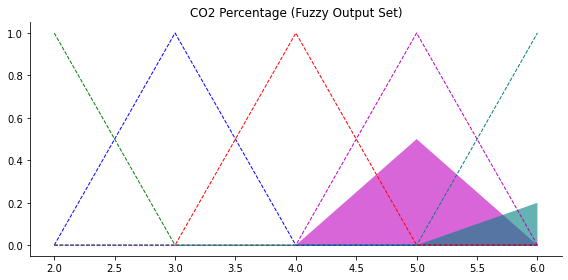

In [9]:
combined = np.zeros_like(x_CO2)

fig, ax0 = plt.subplots(figsize = (8, 4))

ax0.fill_between(x_CO2, combined, CO2_activation_vb, facecolor = "g", alpha = 0.6)
ax0.plot(x_CO2, CO2_vb, "g", linewidth = 1, linestyle = "--")

ax0.fill_between(x_CO2, combined, CO2_activation_b, facecolor = "b", alpha = 0.6)
ax0.plot(x_CO2, CO2_b, "b", linewidth = 1, linestyle = "--")

ax0.fill_between(x_CO2, combined, CO2_activation_n, facecolor = "r", alpha = 0.6)
ax0.plot(x_CO2, CO2_n, "r", linewidth = 1, linestyle = "--")

ax0.fill_between(x_CO2, combined, CO2_activation_g, facecolor = "m", alpha = 0.6)
ax0.plot(x_CO2, CO2_g, "m", linewidth = 1, linestyle = "--")

ax0.fill_between(x_CO2, combined, CO2_activation_vg, facecolor = "teal", alpha = 0.6)
ax0.plot(x_CO2, CO2_vg, "teal", linewidth = 1, linestyle = "--")

ax0.set_title("CO2 Percentage (Fuzzy Output Set)")

for ax in [ax0]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

CO2 Percentage: 5.029000514933178



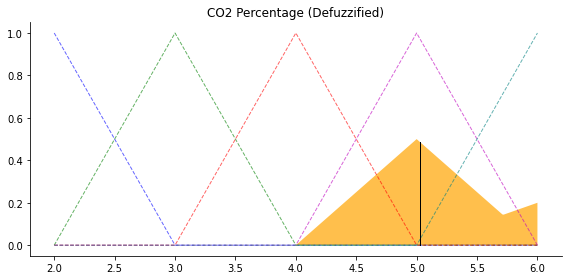

In [10]:
aggregated = np.fmax(CO2_activation_vb,
                     np.fmax(np.fmax(CO2_activation_b, CO2_activation_n), 
                             np.fmax(CO2_activation_g, CO2_activation_vg)))

result = fuzz.defuzz(x_CO2, aggregated, "bisector")  # Defuzzification
CO2_activation = fuzz.interp_membership(x_CO2, aggregated, result)

fig, ax0 = plt.subplots(figsize = (8, 4))

ax0.plot(x_CO2, CO2_vb, "b", linewidth = 1, linestyle = "--", alpha = .6)
ax0.plot(x_CO2, CO2_b, "g", linewidth = 1, linestyle = "--", alpha = .6)
ax0.plot(x_CO2, CO2_n, "r", linewidth = 1, linestyle = "--", alpha = .6)
ax0.plot(x_CO2, CO2_g, "m", linewidth = 1, linestyle = "--", alpha = .6)
ax0.plot(x_CO2, CO2_vg, "teal", linewidth = 1, linestyle = "--", alpha = .6)

ax0.fill_between(x_CO2, combined, aggregated, facecolor = "orange", alpha = .7)
ax0.plot([result, result], [0, CO2_activation], "k", linewidth = 1, alpha = 1)

ax0.set_title("CO2 Percentage (Defuzzified)")

for ax in [ax0]:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

# Crisp Output
print("CO2 Percentage: " + str(result) + "\n")